In [1]:
#합성곱  CNN Convolution Netural Network

In [2]:
# FC 밀집층

In [3]:
# 인공신경망 pptx 참고

In [4]:
import tensorflow  as tf

In [5]:
# fashion mnist 데이터 불러오기

In [6]:
(x_train,y_train),(x_test,y_test) =  tf.keras.datasets.fashion_mnist.load_data()

In [7]:
# 스케일링
x_train_sacled =  x_train / 255.0
x_test_scaled = x_test / 255.0

In [8]:
x_train_sacled.shape

(60000, 28, 28)

In [9]:
# 컨볼류션1
conv2d_1 = tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape = (28,28,1))
polling_1 = tf.keras.layers.MaxPool2D(2)

In [10]:
# 컨볼류션2
conv2d_2 = tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same')
polling_2 = tf.keras.layers.MaxPool2D(2)

In [11]:
# 신경망에 입력하기 위해서 결과물을 1차원형태로 flatten 형태로 펴준다.

In [12]:
# 컨볼류션 신경망을 연결하는 층
flatten =  tf.keras.layers.Flatten()

In [13]:
# 신경망 구성

In [14]:
dense1 = tf.keras.layers.Dense(128,activation='relu')
dropout1 = tf.keras.layers.Dropout(0.2)
dense2 = tf.keras.layers.Dense(10,activation='softmax')


In [15]:
model = tf.keras.Sequential([
    conv2d_1,polling_1,
    conv2d_2,polling_2,
    flatten,
    dense1,
    dropout1,
    dense2
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

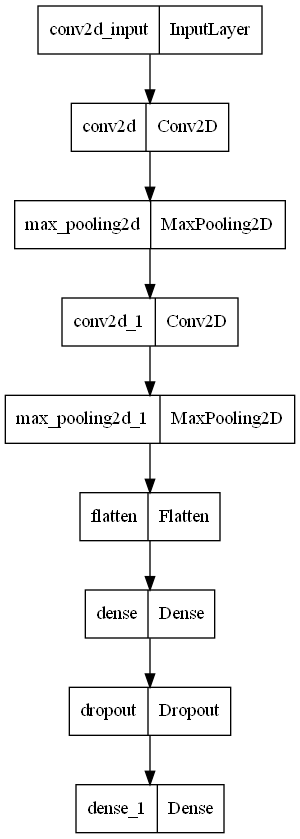

In [17]:
tf.keras.utils.plot_model(model)

In [18]:
# 모델생성 - >컴파일 - > 학습
# 컴파일

In [19]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'] )

In [20]:
import numpy as np

In [21]:
mcp = tf.keras.callbacks.ModelCheckpoint('mymodel.h5',save_best_only=True)
es = tf.keras.callbacks.EarlyStopping(patience=2)

In [22]:
x_train_scaled_4d = np.expand_dims(x_train_sacled,axis=-1)
x_test_scaled_4d = np.expand_dims(x_test_scaled,axis=-1)
x_train_scaled_4d.shape, x_test_scaled_4d.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [23]:
x_train_sacled.shape

(60000, 28, 28)

In [24]:
history = model.fit(x_train_scaled_4d,y_train,epochs=100,callbacks=[mcp,es],validation_split=0.8)

Epoch 1/100
375/375 [==============================] - 14s 35ms/step - loss: 0.6556 - accuracy: 0.7618 - val_loss: 0.4597 - val_accuracy: 0.8358
Epoch 2/100
375/375 [==============================] - 13s 36ms/step - loss: 0.4094 - accuracy: 0.8529 - val_loss: 0.3936 - val_accuracy: 0.8580
Epoch 3/100
375/375 [==============================] - 13s 35ms/step - loss: 0.3409 - accuracy: 0.8756 - val_loss: 0.3425 - val_accuracy: 0.8763
Epoch 4/100
375/375 [==============================] - 13s 34ms/step - loss: 0.3014 - accuracy: 0.8929 - val_loss: 0.3202 - val_accuracy: 0.8840
Epoch 5/100
375/375 [==============================] - 12s 33ms/step - loss: 0.2659 - accuracy: 0.9015 - val_loss: 0.3270 - val_accuracy: 0.8856
Epoch 6/100
375/375 [==============================] - 12s 33ms/step - loss: 0.2403 - accuracy: 0.9129 - val_loss: 0.3007 - val_accuracy: 0.8942
Epoch 7/100
375/375 [==============================] - 12s 32ms/step - loss: 0.2156 - accuracy: 0.9185 - val_loss: 0.2988 - val_ac

In [25]:
model.evaluate(x_test_scaled_4d,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3283 - accuracy: 0.8924


[0.3283189833164215, 0.8924000263214111]

In [26]:
import matplotlib.pyplot as plt

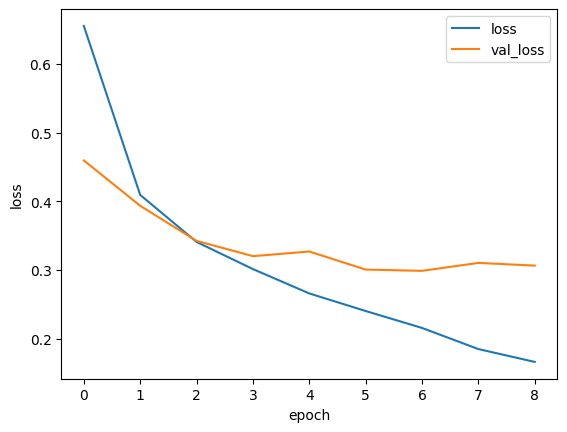

In [27]:
# 손실곡선
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [33]:
np.expand_dims(x_test_scaled_4d[0],axis=0).shape

(1, 28, 28, 1)

In [35]:
np.argmax( model.predict(np.expand_dims(x_test_scaled_4d[0],axis=0)) )

1/1 [==============================] - 0s 18ms/step


9

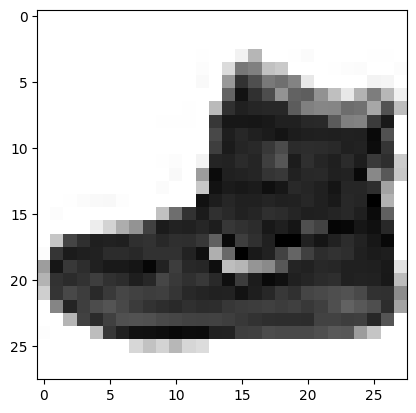

In [39]:
#정답이미지
plt.imshow(x_train[0], cmap='gray_r')
plt.show()

In [41]:
y_test[0]

9